In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from plots.matplotlib_ import load_mpl_presets, named_colors, markers, fancy_legend
load_mpl_presets()
import math as m
import numpy as np
import vice

/home/johnson.7419/Desktop/Research/VICErepos/VICE/vice/__init__.py:142: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


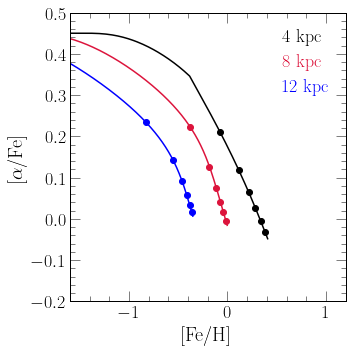

In [4]:
outfilename = "smoothSFH_alphafe_feh_gastracks_postprocess.pdf"

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim([-1.6, 1.2])
ax.set_ylim([-0.2, 0.5])
ax.set_xlabel("[Fe/H]")
ax.set_ylabel(r"[$\alpha$/Fe]")

output = vice.output("../outputs/post-process/smoothSFH_jenniferNSF")
zones = ["zone40", "zone80", "zone120"]
colors = ["black", "crimson", "blue"]
labels = ["4 kpc", "8 kpc", "12 kpc"]
times = [2, 4, 6, 8, 10, 12]

for i in range(len(zones)):
    xvals = output.zones[zones[i]].history["[fe/h]"]
    yvals = output.zones[zones[i]].history["[o/fe]"]
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": labels[i]
    }
    ax.plot(xvals, yvals, **kwargs)
    for j in range(len(times)):
        idx = output.zones[zones[i]].history["time"].index(times[j])
        x = output.zones[zones[i]].history["[fe/h]"][idx]
        y = output.zones[zones[i]].history["[o/fe]"][idx]
        ax.scatter(x, y, c = named_colors()[colors[i]])
leg = ax.legend(handlelength = 0)
fancy_legend(leg, colors)
plt.tight_layout()
# plt.show()
plt.savefig("JenniferNSF/%s" % (outfilename))

<ipython-input-3-06e1e8e2bd5f>:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


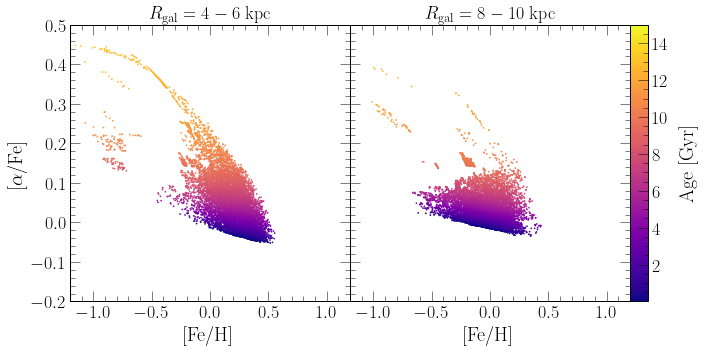

In [3]:
rbins = [[4, 6], [8, 10]]
outfilename = "smoothSFH_alphafe_feh_scatter_age_postprocess.pdf"

fig = plt.figure(figsize = (10, 5))
axes = [fig.add_subplot(121), fig.add_subplot(122)]
plt.setp(axes[1].get_yticklabels(), visible = False)
for ax in axes:
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-0.2, 0.5])
    ax.set_xlabel("[Fe/H]")
axes[0].set_ylabel(r"[$\alpha$/Fe]")
axes[0].set_title(r"$R_\text{gal} = %d - %d$ kpc" % (rbins[0][0], rbins[0][1]))
axes[1].set_title(r"$R_\text{gal} = %d - %d$ kpc" % (rbins[1][0], rbins[1][1]))

# out = vice.output("../outputs/post-process/smoothSFH_jenniferNSF")
# extra = np.genfromtxt("%s_analogdata.out" % (out.name))
# out.stars["abszfinal"] = [abs(_[-1]) for _ in extra[:out.stars.size[0]]]

for i in range(len(axes)):
    sub = out.stars.filter(
        "zone_final", ">=", 10 * rbins[i][0]).filter(
        "zone_final", "<=", 10 * rbins[i][1]).filter(
        "abszfinal", "<=", 0.5)
    mtot = sum(sub["mass"])
    mass_fracs = [_ / mtot for _ in sub["mass"]]
    indeces = np.random.choice(list(range(len(sub["mass"]))), p = mass_fracs, size = 10000)
    xvals = [sub["[fe/h]"][_] for _ in indeces]
    yvals = [sub["[o/fe]"][_] for _ in indeces]
#     color = [(sub["zone_origin"][_] + 0.5) * 0.1 for _ in indeces]
    color = [sub["age"][_] for _ in indeces]
    kwargs = {
        "c": color,
        "s": 0.5,
        "rasterized": True,
        "cmap": plt.get_cmap("plasma"),
        "vmin": 0,
        "vmax": 15
    }
    sc = axes[i].scatter(xvals, yvals, **kwargs)
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical")
# cbar.set_label(r"$R_\text{gal}$ of birth [kpc]", labelpad = 10)
cbar.set_label("Age [Gyr]", labelpad = 10)
cbar.set_ticks(range(2, 16, 2))

plt.tight_layout()
plt.subplots_adjust(wspace = 0, right = 0.88)
cbar_ax.set_position([
    axes[1].get_position().x1,
    axes[1].get_position().y0,
    0.025,
    axes[1].get_position().y1 - axes[1].get_position().y0
])
# plt.show()
plt.savefig("JenniferNSF/%s" % (outfilename))

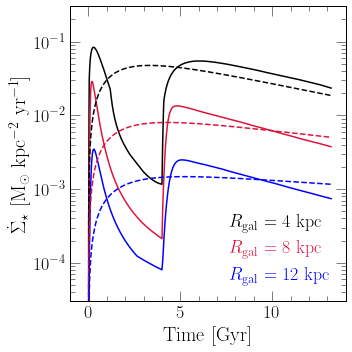

In [7]:
fig = plt.figure(facecolor = "white")
ax = fig.add_subplot(111)
ax.set_xlabel("Time [Gyr]")
ax.set_ylabel(r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]")
ax.set_yscale("log")
ax.set_xlim([-1, 14])
ax.set_ylim([3.e-5, 0.3])

zones = ["zone40", "zone80", "zone120"]
colors = ["black", "crimson", "blue"]
labels = [r"$R_\text{gal}$ = 4 kpc", r"$R_\text{gal}$ = 8 kpc", r"$R_\text{gal}$ = 12 kpc"]

# smooth = vice.output("../outputs/diffusion/smoothSFH_jenniferNSF")
# twoinf = vice.output("../outputs/diffusion/twoinfall_jenniferNSF")

linestyles = ['-', '--']

for output in [twoinf, smooth]:
    for i in range(len(zones)):
        area = m.pi * ([4.1, 8.1, 12.1][i]**2 - [4, 8, 12][i]**2)
        xvals = output.zones[zones[i]].history["time"]
        yvals = [_ / area for _ in output.zones[zones[i]].history["sfr"]]
        kwargs = {
            "c": colors[i],
            "linestyle": '-' if output == twoinf else '--',
        }
        if output == twoinf: kwargs["label"] = labels[i]
        ax.plot(xvals, yvals, **kwargs)

kwargs = {
    "ncol": 1,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)
plt.tight_layout()
plt.savefig("JenniferNSF/SFHcomp.pdf")